# This case study is about apt salary band determination. When an organization decides to hire a new employee and the question is how much salary does this person deserves based on their credentials, demographic/anagraphic details and experience?

Based on the "Census Income" data of 32,561 professionals from around the world. We will try to learn when a candidate deserves a salary greater than $50K and when they does not.

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios. You can use this flow as a template to solve any supervised ML classification problem.

The flow of the case study is as below:

Reading the data in python
Defining the problem statement
Identifying the Target variable
Looking at the distribution of Target variable
Basic Data exploration
Rejecting useless columns
Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
Feature Selection based on data distribution
Outlier treatment
Missing Values treatment
Visual correlation analysis
Statistical correlation analysis (Feature Selection)
Converting data to numeric for ML
Sampling and K-fold cross validation
Trying multiple classification algorithms
Selecting the best Model
Deploying the best model in production

# Data description
The business meaning of each column in the data is as below

id: index

age: Age of the employee

workclass: Which type of organization the employee works in? State-gov/Private etc.

education: The highest education of the employee

marital_status: The marital status of the employee

occupation: The type of job

relationship: Type of relationship in? Husband, wife etc.

race: Which race the employee belongs to

gender: Gender of the employee

capital_gain: How much capital gains does the employee gets in an year

capital.loss: How much capital loss does the employee bears in an year

hours_per_week: How many hours the employee works in a week?

country: Which country the employee is working?

income: Is the salary greater than $50,000K or not

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
SalaryData=pd.read_csv(r'C:\Users\SAYAN\Desktop\New folder (2)\train.csv', encoding='latin')
print('Shape before deleting duplicate values:', SalaryData.shape)

# Removing duplicate rows if any
SalaryData=SalaryData.drop_duplicates()
print('Shape After deleting duplicate values:', SalaryData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
SalaryData.head(10)

Shape before deleting duplicate values: (32561, 14)
Shape After deleting duplicate values: (32561, 14)


,Id,Age,Workclass,Education,MaritalStatus,Occuptaion,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,Country,Income
0,trn1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,trn2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,trn3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,trn4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,trn5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,trn6,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,trn7,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,trn8,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,trn9,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,trn10,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Defining the problem statement:

Create a Classification model which can tell if a person deserves a salary greater than 50,000 dollars or not?

Target Variable: income

Predictors: age, workclass, education, marital_status, occupation etc.

income=0 The employee earns less than or equal to 50,000 dollars in a year

income=1 The employee earns more than 50,000 dollars in a year

# Looking at the distribution of Target variable & Basic Data Exploration

In [3]:
SalaryData.columns = SalaryData.columns.str.lower()
SalaryData['income'].replace({'<=50K':0, '>50K':1}, inplace=True)
SalaryData.head(10)

,id,age,workclass,education,maritalstatus,occuptaion,relationship,race,gender,capitalgain,capitalloss,hoursperweek,country,income
0,trn1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,trn2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,trn3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,trn4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,trn5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,trn6,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,trn7,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,trn8,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,trn9,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,trn10,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


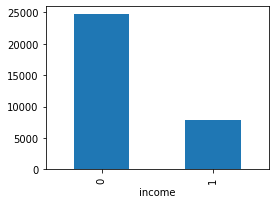

In [4]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=SalaryData.groupby('income').size()
GroupedData.plot(kind='bar', figsize=(4,3))

### The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

There are four commands which are used for Basic data exploration in Python

head() : This helps to see a few sample rows of the data

info() : This provides the summarized information of the data

describe() : This provides the descriptive statistical details of the data

nunique(): This helps us to identify if a column is categorical or continuous

In [5]:
# Looking at sample rows in the data
SalaryData.head()

,id,age,workclass,education,maritalstatus,occuptaion,relationship,race,gender,capitalgain,capitalloss,hoursperweek,country,income
0,trn1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,trn2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,trn3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,trn4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,trn5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [6]:
SalaryData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             32561 non-null  object
 1   age            32561 non-null  int64 
 2   workclass      32561 non-null  object
 3   education      32561 non-null  object
 4   maritalstatus  32561 non-null  object
 5   occuptaion     32561 non-null  object
 6   relationship   32561 non-null  object
 7   race           32561 non-null  object
 8   gender         32561 non-null  object
 9   capitalgain    32561 non-null  int64 
 10  capitalloss    32561 non-null  int64 
 11  hoursperweek   32561 non-null  int64 
 12  country        32561 non-null  object
 13  income         32561 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


In [7]:
SalaryData.describe(include='all')

,id,age,workclass,education,maritalstatus,occuptaion,relationship,race,gender,capitalgain,capitalloss,hoursperweek,country,income
count,32561,32561.000000,32561,32561,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561.000000
unique,32561,NaN,9,16,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,trn31168,NaN,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,1,NaN,22696,10501,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,NaN
mean,NaN,38.581647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,NaN,13.640433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [8]:
SalaryData.nunique()

id               32561
age                 73
workclass            9
education           16
maritalstatus        7
occuptaion          15
relationship         6
race                 5
gender               2
capitalgain        119
capitalloss         92
hoursperweek        94
country             42
income               2
dtype: int64

# Basic Data Exploration Results

Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

age: Continuous. Selected.

workclass: Categorical. Selected.

education: Categorical. Selected.

marital_status: Categorical. Selected.

occupation: Categorical. Selected.

relationship: Categorical. Selected.

race: Categorical. Selected.

gender: Categorical. Selected.

capital_gain: Continuous. Selected.

capital.loss: Continuous. Selected.

hours_per_week: Continuous. Selected.

country: Categorical. Selected.

income: Categorical. Selected. This is the Target Variable!

# Visual Exploratory Data Analysis

Categorical variables: Bar plot
Continuous variables: Histogram

# Visualize distribution of all the Categorical Predictor variables in the data using bar plots

In [9]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

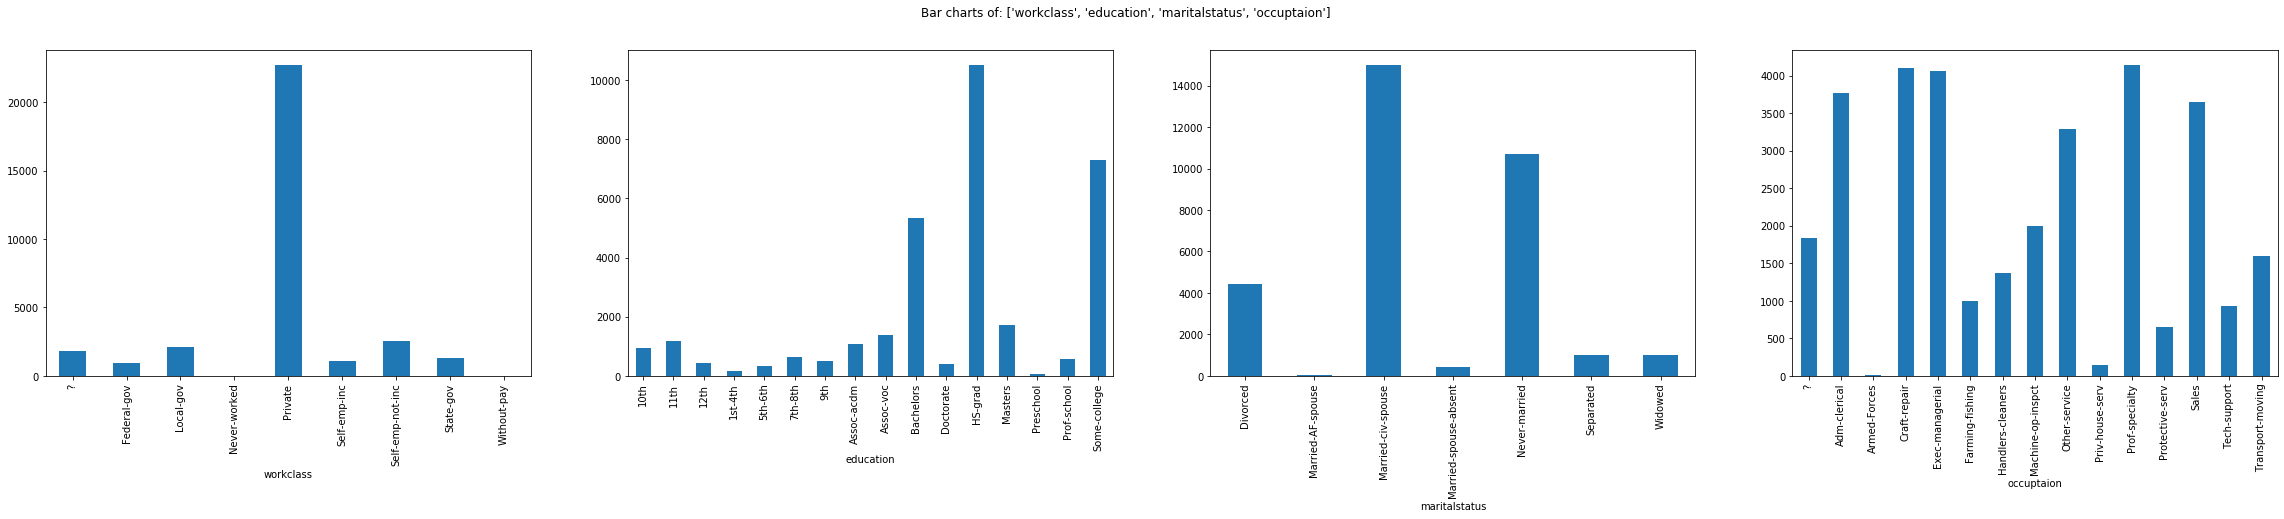

In [10]:
# Calling the function
PlotBarCharts(inpData=SalaryData, colsToPlot=['workclass', 'education', 'maritalstatus','occuptaion'])

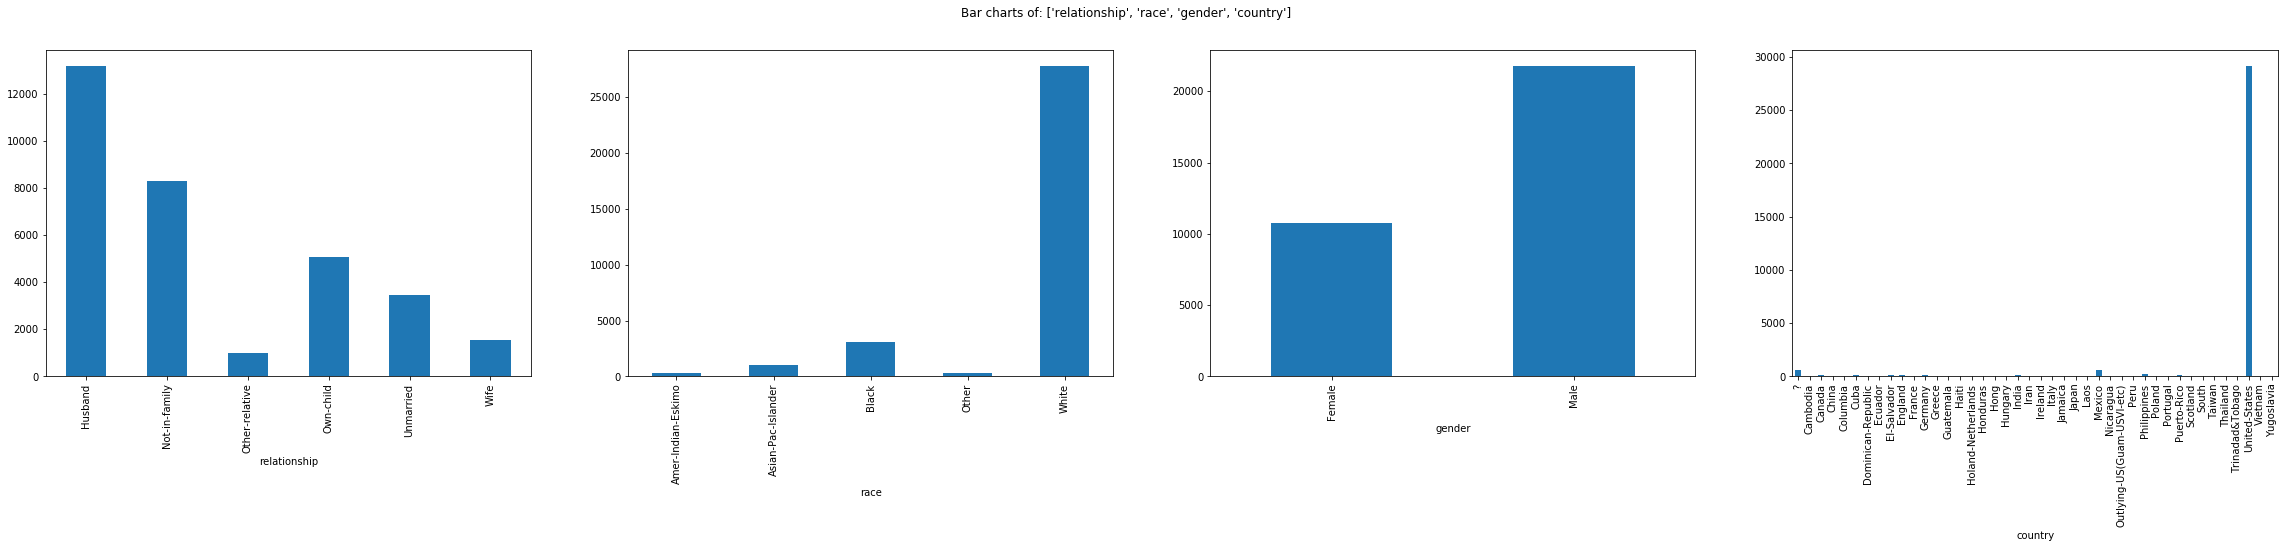

In [11]:
# Calling the function
PlotBarCharts(inpData=SalaryData, colsToPlot=['relationship', 'race', 'gender', 'country'])

## Bar Charts Interpretation 

If there is a column which shows too skewed distribution like "country" where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. 

Selected Categorical Variables: All the categorical variables are selected except "country".

'workclass', 'education', 'marital_status','occupation', 'relationship', 'race', 'sex'

### Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EA9B49A488>,
      dtype=object)

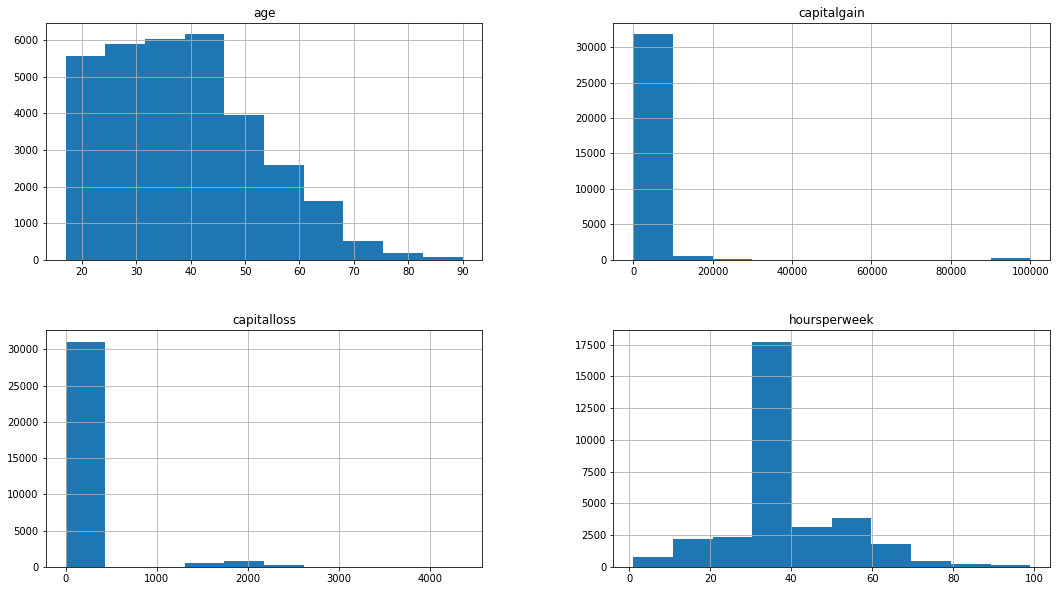

In [12]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
SalaryData.hist(['age','capitalgain','capitalloss','hoursperweek'], figsize=(18,10))

## Selected Continuous Variables:

age : Selected.

capital_gain: Selected. Outliers seen beyond 40000, need to treat them.

capital.loss: Selected. Outliers seen beyond 1000, need to treat them.

hours_per_week: Selected. Distribution looks good.

# Outlier treatment

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

In [13]:
# Finding nearest values to 40000 mark
SalaryData['capitalgain'][SalaryData['capitalgain']>40000].sort_values()

6433     41310
20176    41310
20987    99999
21188    99999
21489    99999
         ...  
12062    99999
12093    99999
12141    99999
32238    99999
32518    99999
Name: capitalgain, Length: 161, dtype: int64

In [14]:
# Replacing outliers with nearest possibe value
SalaryData['capitalgain'][SalaryData['capitalgain']>40000] = 41310

In [15]:
# Finding nearest values to 1000 mark
SalaryData['capitalloss'][SalaryData['capitalloss']<1000].sort_values(ascending=False)

7032     974
11043    974
4424     880
11442    880
15585    880
        ... 
21717      0
21718      0
21719      0
21720      0
0          0
Name: capitalloss, Length: 31078, dtype: int64

In [16]:
# Replacing outliers with nearest possibe value
SalaryData['capitalloss'][SalaryData['capitalloss']>1000] = 974

## Visualizing distribution after outlier treatment

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EA9B67E648>,
      dtype=object)

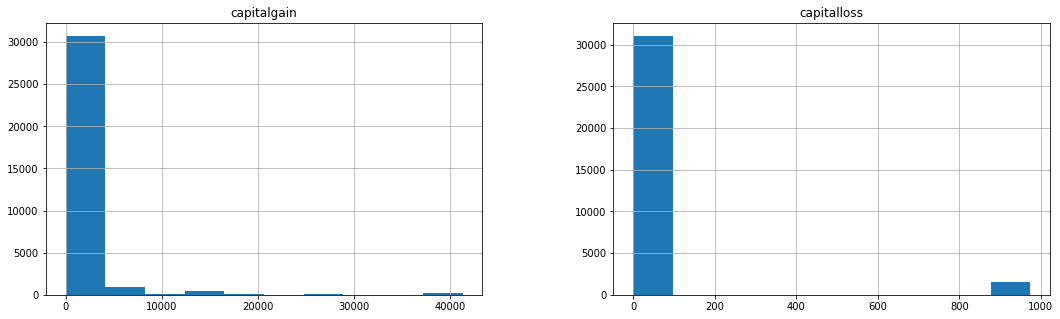

In [17]:
SalaryData.hist(['capitalgain','capitalloss'], figsize=(18,5))

# Missing values treatment

Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

In [18]:
# Finding how many missing values are there for each column
SalaryData.isnull().sum()

id               0
age              0
workclass        0
education        0
maritalstatus    0
occuptaion       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
country          0
income           0
dtype: int64

In [19]:
#SalaryData['workclass'].fillna(SalaryData['workclass'].mode()[0], inplace=True)
#SalaryData['occuptaion'].fillna(SalaryData['occuptaion'].mode()[0], inplace=True)
#SalaryData['country'].fillna(SalaryData['country'].mode()[0], inplace=True)

In [20]:
SalaryData.isnull().sum()

id               0
age              0
workclass        0
education        0
maritalstatus    0
occuptaion       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
country          0
income           0
dtype: int64

# Feature Selection

Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

Visual exploration of relationship between variables

    Continuous Vs Continuous ---- Scatter Plot
    Categorical Vs Continuous---- Box Plot
    Categorical Vs Categorical---- Grouped Bar Plots

Statistical measurement of relationship strength between variables

    Continuous Vs Continuous ---- Correlation matrix
    Categorical Vs Continuous---- ANOVA test
    Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is categorical, hence below two scenarios will be present

    Categorical Target Variable Vs Continuous Predictor
    Categorical Target Variable Vs Categorical Predictor

## Relationship exploration: Categorical Vs Continuous -- Box Plots

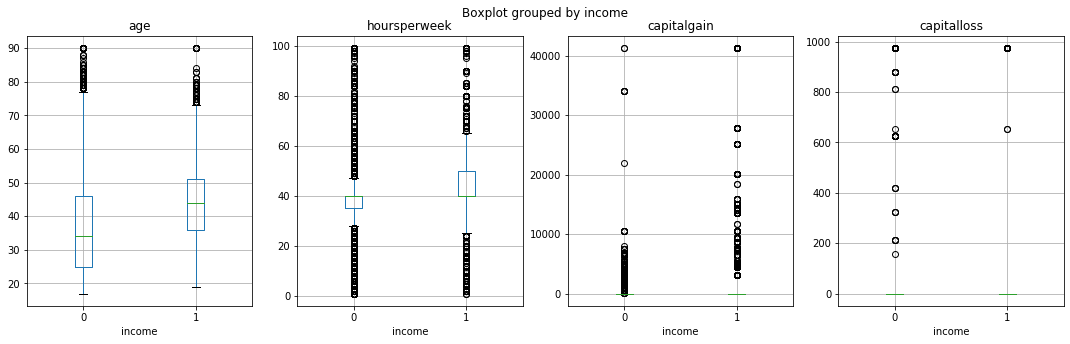

In [21]:
# Box plots for Categorical Target Variable "income" and continuous predictors
ContinuousColsList=['age','hoursperweek','capitalgain','capitalloss']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "income"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    SalaryData.boxplot(column=PredictorCol, by='income', figsize=(5,5), vert=True, ax=PlotCanvas[i])


### If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.





# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
ANOVA Test result: Probability of H0 being true

In [22]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [23]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['age','hoursperweek','capitalgain','capitalloss']
FunctionAnova(inpData=SalaryData, TargetVariable='income', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

age is correlated with income | P-Value: 0.0
hoursperweek is correlated with income | P-Value: 0.0
capitalgain is correlated with income | P-Value: 0.0
capitalloss is correlated with income | P-Value: 2.9353985714024566e-143


['age', 'hoursperweek', 'capitalgain', 'capitalloss']

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

In [24]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=SalaryData['maritalstatus'], columns=SalaryData['income'])
CrossTabResult

income,0,1
maritalstatus,,
Divorced,3980,463
Married-AF-spouse,13,10
Married-civ-spouse,8284,6692
Married-spouse-absent,384,34
Never-married,10192,491
Separated,959,66
Widowed,908,85


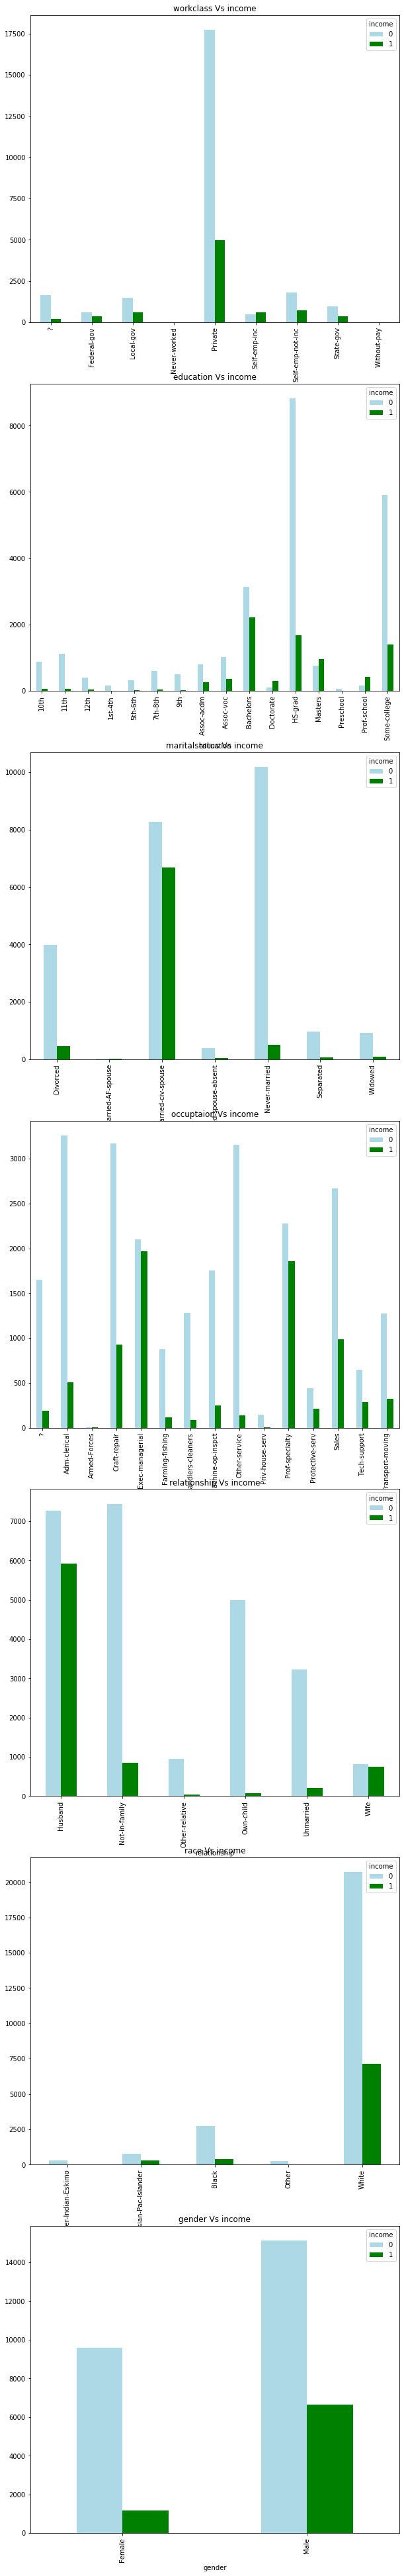

In [25]:
#Visual Inference using Grouped Bar charts
CategoricalColsList=['workclass', 'education', 'maritalstatus','occuptaion',
                    'relationship', 'race', 'gender']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,70))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "income"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=SalaryData[CategoricalCol], columns=SalaryData['income'])
    CrossTabResult.plot.bar(color=['lightblue','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'income')

### These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated.

## Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

    Assumption(H0): The two columns are NOT related to each other
    Result of Chi-Sq Test: The Probability of H0 being True

In [26]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [27]:
CategoricalVariables=['workclass', 'education', 'maritalstatus','occuptaion',
                    'relationship', 'race', 'gender']

# Calling the function
FunctionChisq(inpData=SalaryData, 
              TargetVariable='income',
              CategoricalVariablesList= CategoricalVariables)

workclass is correlated with income | P-Value: 2.026505431120716e-220
education is correlated with income | P-Value: 0.0
maritalstatus is correlated with income | P-Value: 0.0
occuptaion is correlated with income | P-Value: 0.0
relationship is correlated with income | P-Value: 0.0
race is correlated with income | P-Value: 2.305960610160958e-70
gender is correlated with income | P-Value: 0.0


['workclass',
 'education',
 'maritalstatus',
 'occuptaion',
 'relationship',
 'race',
 'gender']

# Selecting final predictors for Machine Learning

In [28]:
SelectedColumns=['workclass', 'education', 'maritalstatus', 'occuptaion', 
                 'relationship', 'race', 'gender','age', 'hoursperweek',
                 'capitalgain', 'capitalloss']

# Selecting final columns
DataForML=SalaryData[SelectedColumns]
DataForML.head()

,workclass,education,maritalstatus,occuptaion,relationship,race,gender,age,hoursperweek,capitalgain,capitalloss
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,39,40,2174,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,13,0,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,38,40,0,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,53,40,0,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,28,40,0,0


In [29]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Data Pre-processing for Machine Learning

List of steps performed on predictor variables before data can be used for machine learning

    1. Converting each Ordinal Categorical columns to numeric
    2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
    3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
    4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In [30]:
DataForML['education'].unique()
DataForML['gender'].unique()

array(['Male', 'Female'], dtype=object)

### Converting the binary nominal variable to numeric using 1/0 mapping

In [31]:
# Converting the binary nominal variable sex to numeric
DataForML['gender'].replace({' Female':0, ' Male':1}, inplace=True)

### Converting the Ordinal categorical variable

In [32]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
DataForML['education_num']= label_encoder.fit_transform(DataForML['education'])

### Converting the nominal variable to numeric using get_dummies()

In [33]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['income']=SalaryData['income']

# Printing sample rows
DataForML_Numeric.head()

,age,hoursperweek,capitalgain,capitalloss,education_num,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,income
0,39,40,2174,0,9,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,50,13,0,0,9,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,38,40,0,0,11,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,53,40,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,28,40,0,0,9,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [34]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
DataForML_Numeric.head()

,age,hoursperweek,capitalgain,capitalloss,education_num,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,maritalstatus_Divorced,maritalstatus_Married-AF-spouse,maritalstatus_Married-civ-spouse,maritalstatus_Married-spouse-absent,maritalstatus_Never-married,maritalstatus_Separated,maritalstatus_Widowed,occuptaion_?,occuptaion_Adm-clerical,occuptaion_Armed-Forces,occuptaion_Craft-repair,occuptaion_Exec-managerial,occuptaion_Farming-fishing,occuptaion_Handlers-cleaners,occuptaion_Machine-op-inspct,occuptaion_Other-service,occuptaion_Priv-house-serv,occuptaion_Prof-specialty,occuptaion_Protective-serv,occuptaion_Sales,occuptaion_Tech-support,occuptaion_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,income
0,39,40,2174,0,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,50,13,0,0,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2,38,40,0,0,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,53,40,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,28,40,0,0,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


# Machine Learning: Splitting the data into Training and Testing sample

In [35]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['age', 'hoursperweek', 'capitalgain', 'capitalloss', 'education_num',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'maritalstatus_Divorced', 'maritalstatus_Married-AF-spouse',
       'maritalstatus_Married-civ-spouse',
       'maritalstatus_Married-spouse-absent', 'maritalstatus_Never-married',
       'maritalstatus_Separated', 'maritalstatus_Widowed', 'occuptaion_?',
       'occuptaion_Adm-clerical', 'occup

In [36]:
TargetVariable='income'
Predictors=['education_num', 'age', 'hoursperweek', 'capitalgain', 'capitalloss',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'maritalstatus_Divorced',
       'maritalstatus_Married-AF-spouse', 'maritalstatus_Married-civ-spouse',
       'maritalstatus_Married-spouse-absent', 'maritalstatus_Never-married',
       'maritalstatus_Separated', 'maritalstatus_Widowed', 'occuptaion_?',
       'occuptaion_Adm-clerical', 'occuptaion_Armed-Forces',
       'occuptaion_Craft-repair', 'occuptaion_Exec-managerial',
       'occuptaion_Farming-fishing', 'occuptaion_Handlers-cleaners',
       'occuptaion_Machine-op-inspct', 'occuptaion_Other-service',
       'occuptaion_Priv-house-serv', 'occuptaion_Prof-specialty',
       'occuptaion_Protective-serv', 'occuptaion_Sales',
       'occuptaion_Tech-support', 'occuptaion_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'gender_Female', 'gender_Male']

In [37]:
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [38]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Standardization/Normalization of data



In [39]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22792, 49)
(22792,)
(9769, 49)
(9769,)


# Logistic Regression

In [41]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7455
           1       0.70      0.59      0.64      2314

    accuracy                           0.84      9769
   macro avg       0.79      0.76      0.77      9769
weighted avg       0.84      0.84      0.84      9769

[[6863  592]
 [ 939 1375]]
Accuracy of the model on Testing Sample Data: 0.84

Accuracy values for 10-fold Cross Validation:
 [0.83581715 0.834216   0.8333842  0.82480219 0.84210984 0.83321935
 0.83323905 0.84228444 0.84733756 0.83968891]

Final Average Accuracy of the model: 0.84


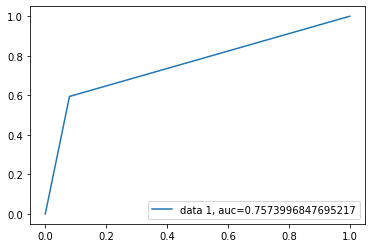

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,prediction)
auc = roc_auc_score(y_test,prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision Trees

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7455
           1       0.75      0.51      0.61      2314

    accuracy                           0.84      9769
   macro avg       0.81      0.73      0.75      9769
weighted avg       0.84      0.84      0.83      9769

[[7071  384]
 [1139 1175]]
Accuracy of the model on Testing Sample Data: 0.83

Accuracy values for 10-fold Cross Validation:
 [0.82498636 0.82965228 0.82553275 0.82384346 0.8317817  0.81778296
 0.82627206 0.82479753 0.83011944 0.83144036]

Final 

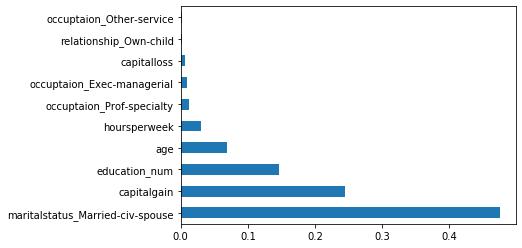

In [43]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=6,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

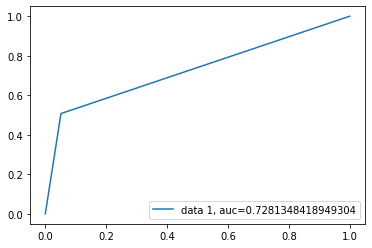

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,prediction)
auc = roc_auc_score(y_test,prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      7455
           1       0.87      0.35      0.50      2314

    accuracy                           0.83      9769
   macro avg       0.85      0.67      0.70      9769
weighted avg       0.84      0.83      0.81      9769

[[7335  120]
 [1501  813]]
Accuracy of the model on Testing Sample Data: 0.81

Accuracy values for 10-fold Cross Validation:
 [0.

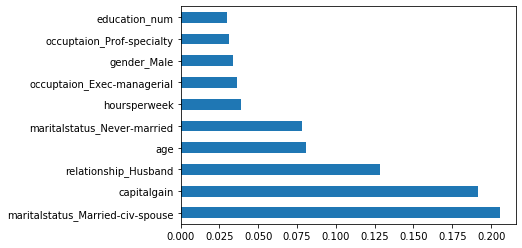

In [45]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=5, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

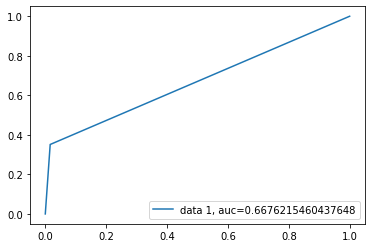

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,prediction)
auc = roc_auc_score(y_test,prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Adaboost

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

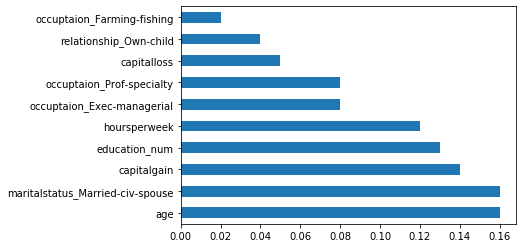

In [47]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.1)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

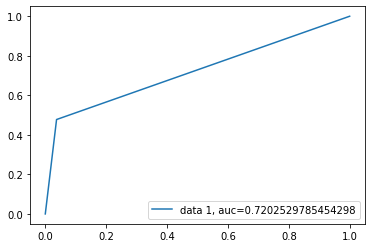

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,prediction)
auc = roc_auc_score(y_test,prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# XGBoost

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=True,
              validate_parameters=None, verbosity=None)
[11:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old b

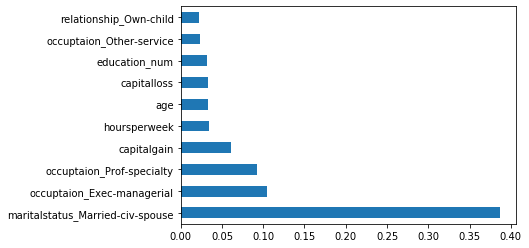

In [49]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

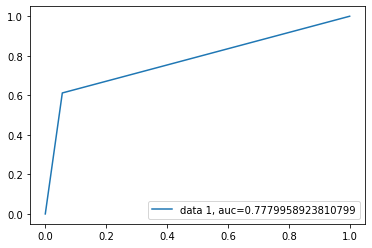

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,prediction)
auc = roc_auc_score(y_test,prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# KNN

In [51]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7455
           1       0.64      0.58      0.61      2314

    accuracy                           0.82      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.82      0.82      0.82      9769

[[6702  753]
 [ 981 1333]]
Accuracy of the model on Testing Sample Data: 0.82

Accuracy values for 10-fold Cross Validation:
 [0.80984768 0.81173635 0.82422107 0.80811066 0.82376144 0.82100095
 0.81346853 0.82133599 0.81992563 0.80952863]

Final Average Accuracy of the model: 0.82


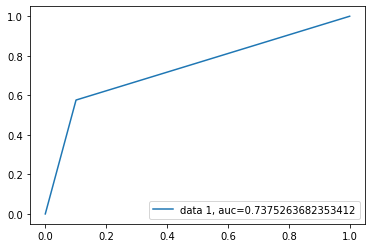

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,prediction)
auc = roc_auc_score(y_test,prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SVM

In [53]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=3, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7455
           1       0.72      0.58      0.64      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

[[6925  530]
 [ 981 1333]]
Accuracy of the model on Testing Sample Data: 0.84

Accuracy values for 10-fold Cross Validation:
 [0.83770849 0.84505589 0.83481165 0.83474294 0.84458855 0.83402918
 0.83954689 0.84020938 0.84351693 0.84103005]

Final Average Accuracy of the model: 0.84


# I am choosing XGBOOST as the final model since it is fast and accuarcy is better for this data!  >>>>>>>>>>>>>>>                and                 <<<<<<<<<<<<<<  I am choosing Logistic Regression as the final model for production since it is very fast for this data!

# Loading Test data and then Data preprocessing

In [54]:
test=pd.read_csv(r'C:\Users\SAYAN\Desktop\New folder (2)\test.csv', encoding='latin')
ids = test['Id']

In [55]:
test.columns = test.columns.str.lower()

In [56]:
SelectedColumns=['workclass', 'education', 'maritalstatus', 'occuptaion', 
                 'relationship', 'race', 'gender','age', 'hoursperweek',
                 'capitalgain', 'capitalloss']

# Selecting final columns
DataFortest=test[SelectedColumns]
DataFortest.head()

,workclass,education,maritalstatus,occuptaion,relationship,race,gender,age,hoursperweek,capitalgain,capitalloss
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,25,40,0,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,38,50,0,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,28,40,0,0
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,44,40,7688,0
4,?,Some-college,Never-married,?,Own-child,White,Female,18,30,0,0


In [57]:
DataFortest['gender'].replace({' Female':0, ' Male':1}, inplace=True)

In [58]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
DataFortest['education_num']= label_encoder.fit_transform(DataFortest['education'])
DataFortest_Numeric=pd.get_dummies(DataFortest)

In [59]:
DataFortest_Numeric.head()

,age,hoursperweek,capitalgain,capitalloss,education_num,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,maritalstatus_Divorced,maritalstatus_Married-AF-spouse,maritalstatus_Married-civ-spouse,maritalstatus_Married-spouse-absent,maritalstatus_Never-married,maritalstatus_Separated,maritalstatus_Widowed,occuptaion_?,occuptaion_Adm-clerical,occuptaion_Armed-Forces,occuptaion_Craft-repair,occuptaion_Exec-managerial,occuptaion_Farming-fishing,occuptaion_Handlers-cleaners,occuptaion_Machine-op-inspct,occuptaion_Other-service,occuptaion_Priv-house-serv,occuptaion_Prof-specialty,occuptaion_Protective-serv,occuptaion_Sales,occuptaion_Tech-support,occuptaion_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,25,40,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,38,50,0,0,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,28,40,0,0,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,44,40,7688,0,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,18,30,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [60]:
X=DataFortest_Numeric.values

In [61]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)


In [62]:
DataFortest_Numeric.head()

,age,hoursperweek,capitalgain,capitalloss,education_num,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,maritalstatus_Divorced,maritalstatus_Married-AF-spouse,maritalstatus_Married-civ-spouse,maritalstatus_Married-spouse-absent,maritalstatus_Never-married,maritalstatus_Separated,maritalstatus_Widowed,occuptaion_?,occuptaion_Adm-clerical,occuptaion_Armed-Forces,occuptaion_Craft-repair,occuptaion_Exec-managerial,occuptaion_Farming-fishing,occuptaion_Handlers-cleaners,occuptaion_Machine-op-inspct,occuptaion_Other-service,occuptaion_Priv-house-serv,occuptaion_Prof-specialty,occuptaion_Protective-serv,occuptaion_Sales,occuptaion_Tech-support,occuptaion_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,25,40,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,38,50,0,0,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,28,40,0,0,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,44,40,7688,0,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,18,30,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [63]:
DataForML_Numeric.columns

Index(['age', 'hoursperweek', 'capitalgain', 'capitalloss', 'education_num',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'maritalstatus_Divorced', 'maritalstatus_Married-AF-spouse',
       'maritalstatus_Married-civ-spouse',
       'maritalstatus_Married-spouse-absent', 'maritalstatus_Never-married',
       'maritalstatus_Separated', 'maritalstatus_Widowed', 'occuptaion_?',
       'occuptaion_Adm-clerical', 'occup

In [64]:
TargetVariable='income'
Predictors=['education_num', 'age', 'hoursperweek', 'capitalgain', 'capitalloss',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'maritalstatus_Divorced',
       'maritalstatus_Married-AF-spouse', 'maritalstatus_Married-civ-spouse',
       'maritalstatus_Married-spouse-absent', 'maritalstatus_Never-married',
       'maritalstatus_Separated', 'maritalstatus_Widowed', 'occuptaion_?',
       'occuptaion_Adm-clerical', 'occuptaion_Armed-Forces',
       'occuptaion_Craft-repair', 'occuptaion_Exec-managerial',
       'occuptaion_Farming-fishing', 'occuptaion_Handlers-cleaners',
       'occuptaion_Machine-op-inspct', 'occuptaion_Other-service',
       'occuptaion_Priv-house-serv', 'occuptaion_Prof-specialty',
       'occuptaion_Protective-serv', 'occuptaion_Sales',
       'occuptaion_Tech-support', 'occuptaion_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'gender_Female', 'gender_Male']

#  Test Data for XGboost prediction

In [65]:
X_train=DataForML_Numeric[Predictors].values
y_train=DataForML_Numeric[TargetVariable].values
X_test=DataFortest_Numeric[Predictors].values

In [66]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(32561, 49)
(32561,)
(16281, 49)


In [67]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=True,
              validate_parameters=None, verbosity=None)
[12:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old b

In [68]:
prediction

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

# Submission and Data Export

In [69]:
submission = pd.DataFrame({'Id' : ids ,'Income Band': prediction })

In [70]:
submission.head(30)

,Id,Income Band
0,tst1,0
1,tst2,0
2,tst3,0
3,tst4,1
4,tst5,0
5,tst6,0
6,tst7,0
7,tst8,0
8,tst9,0
9,tst10,0


In [71]:
submission['Income Band'].replace({0 :'<=50K', 1:'>50K'}, inplace=True)

In [72]:
submission.to_csv(r'C:\Users\SAYAN\Desktop\New folder (2)\sayanayaksubmission.csv', header=True, index=False)

# Deployment by FLASK API

In [73]:
# Separate Target Variable and Predictor Variables
TargetVariable='income'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['education_num', 'age', 'hoursperweek', 'capitalgain', 'capitalloss',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'maritalstatus_Divorced',
       'maritalstatus_Married-AF-spouse', 'maritalstatus_Married-civ-spouse',
       'maritalstatus_Married-spouse-absent', 'maritalstatus_Never-married',
       'maritalstatus_Separated', 'maritalstatus_Widowed', 'occuptaion_?',
       'occuptaion_Adm-clerical', 'occuptaion_Armed-Forces',
       'occuptaion_Craft-repair', 'occuptaion_Exec-managerial',
       'occuptaion_Farming-fishing', 'occuptaion_Handlers-cleaners',
       'occuptaion_Machine-op-inspct', 'occuptaion_Other-service',
       'occuptaion_Priv-house-serv', 'occuptaion_Prof-specialty',
       'occuptaion_Protective-serv', 'occuptaion_Sales',
       'occuptaion_Tech-support', 'occuptaion_Transport-moving']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)


(32561, 36)
(32561,)


In [74]:
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
# Using the Logistic Regression algorithm with final hyperparamters
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Training the model on 100% Data available
FinalLogisticModel=clf.fit(X,y)

In [75]:
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(FinalLogisticModel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.8337069  0.83448537 0.83357163 0.82318973 0.84103285 0.83385
 0.83212877 0.84248176 0.84571187 0.84067558]

Final Average Accuracy of the model: 0.84


In [76]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('FinalLogisticModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalLogisticModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\SAYAN


In [77]:
# This Function can be called from any from any front end tool/website
def PredictSalaryBand(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['education_num', 'age', 'hoursperweek', 'capitalgain', 'capitalloss',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'maritalstatus_Divorced',
       'maritalstatus_Married-AF-spouse', 'maritalstatus_Married-civ-spouse',
       'maritalstatus_Married-spouse-absent', 'maritalstatus_Never-married',
       'maritalstatus_Separated', 'maritalstatus_Widowed', 'occuptaion_?',
       'occuptaion_Adm-clerical', 'occuptaion_Armed-Forces',
       'occuptaion_Craft-repair', 'occuptaion_Exec-managerial',
       'occuptaion_Farming-fishing', 'occuptaion_Handlers-cleaners',
       'occuptaion_Machine-op-inspct', 'occuptaion_Other-service',
       'occuptaion_Priv-house-serv', 'occuptaion_Prof-specialty',
       'occuptaion_Protective-serv', 'occuptaion_Sales',
       'occuptaion_Tech-support', 'occuptaion_Transport-moving']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalLogisticModel.pkl', 'rb') as fileReadStream:
        LogisticModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=LogisticModel.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [78]:
NewEmployeeDetails=pd.DataFrame(
data=[[39,11,40,15024,0,'State-gov','Never-married','Sales'],
     [40,11,40,2174,0,'Private','Never-married','Tech-support']],
columns=['age', 'education_num', 'hoursperweek','capitalgain', 
         'capitalloss', 'workclass', 'maritalstatus','occuptaion'])

print(NewEmployeeDetails)

# Calling the Function for prediction
PredictSalaryBand(InputData= NewEmployeeDetails)

   age  education_num  hoursperweek  capitalgain  capitalloss  workclass  \
0   39             11            40        15024            0  State-gov   
1   40             11            40         2174            0    Private   

   maritalstatus    occuptaion  
0  Never-married         Sales  
1  Never-married  Tech-support  


,Predicted Status
0,1
1,0


In [79]:
# Creating the function which can take inputs and return predictions
def FunctionSalaryBandPrediction(inp_age, inp_education_num , inp_hours_per_week, inp_capital_gain,
                               inp_capital_loss, inp_workclass, inp_marital_status,inp_occuptaion):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_age, inp_education_num , inp_hours_per_week, inp_capital_gain,
           inp_capital_loss, inp_workclass, inp_marital_status,inp_occuptaion]],
     columns=['age', 'education_num', 'hoursperweek','capitalgain', 
         'capitalloss', 'workclass', 'maritalstatus','occuptaion'])

    # Calling the function defined above using the input parameters
    Predictions=PredictSalaryBand(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionSalaryBandPrediction(inp_age=39,
                             inp_education_num =13,
                             inp_hours_per_week=40,
                             inp_capital_gain=15024,
                             inp_capital_loss=0,
                             inp_workclass='State-gov',
                             inp_marital_status='Never-married',
                             inp_occuptaion='Tech-support',
                            )

'{"Predicted Status":{"0":1}}'

In [80]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [81]:
app = Flask(__name__)

@app.route('/get_salary_band_prediction', methods=["GET"])
def get_salary_band_prediction():
    try:
        # Getting the paramters from API call
        age_value = float(request.args.get('age'))
        education_num_value = float(request.args.get('education_num'))
        hours_per_week_value=float(request.args.get('hoursperweek'))
        capital_gain_value=float(request.args.get('capitalgain'))
        capital_loss_value = float(request.args.get('capitalloss'))
        workclass_value = request.args.get('workclass')
        marital_status_value = request.args.get('maritalstatus')
        occuptaion_value=request.args.get('occuptaion')
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionSalaryBandPrediction(
                             inp_age=age_value,
                             inp_education_num =education_num_value,
                             inp_hours_per_week=hours_per_week_value,
                             inp_capital_gain=capital_gain_value,
                             inp_capital_loss=capital_loss_value,
                             inp_workclass=workclass_value,
                             inp_marital_status=marital_status_value,
                             inp_occuptaion=occuptaion_value
                             )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

In [ ]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [31/Jan/2021 13:00:39] "GET /get_salary_band_prediction?age=25&education_num=11&hoursperweek=40&capitalgain=0&capitalloss=0&workclass=%27State-gov%27&maritalstatus=%27Never-married%27&occuptaion=%27Tech-support%27 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2021 13:00:40] "GET /favicon.ico HTTP/1.1" 404 -


# http://127.0.0.1:8080/get_salary_band_prediction?age=25&education_num=11&hoursperweek=40&capitalgain=0&capitalloss=0&workclass='State-gov'&maritalstatus='Never-married'&occuptaion='Tech-support'